# Impporting Libraries

In [23]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [24]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\unified_monthly_data_interpolated_1990_20250101.csv")

<p style="font-size: 80px;">Project :</p>

## **USA House Price Index & MacroEconomic Prediction Analysis**

# Data Info

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               421 non-null    object 
 1   Region                             421 non-null    object 
 2   AverageSalesPrice_NewHousesSold    421 non-null    float64
 3   AverageSalesPrice                  421 non-null    float64
 4   HomePriceIndex                     421 non-null    float64
 5   NewOneFamilyHousesSold             421 non-null    float64
 6   MonthlySupplyofNewHouses           421 non-null    float64
 7   MedianSalesPriceofHousesSold       421 non-null    float64
 8   HomeownershipRate                  421 non-null    float64
 9   TotalShipmentsofNewHomes           421 non-null    float64
 10  UnemploymentRate                   421 non-null    float64
 11  EconomicPolicyUncertaintyIndex     421 non-null    float64

In [31]:
df.shape

(421, 23)

# Data Handling & Cleaning

In [26]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

# Preprocessing

In [27]:
# Preprocessing
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.drop(columns=['Region'], inplace=True)

# Correlation Heatmap

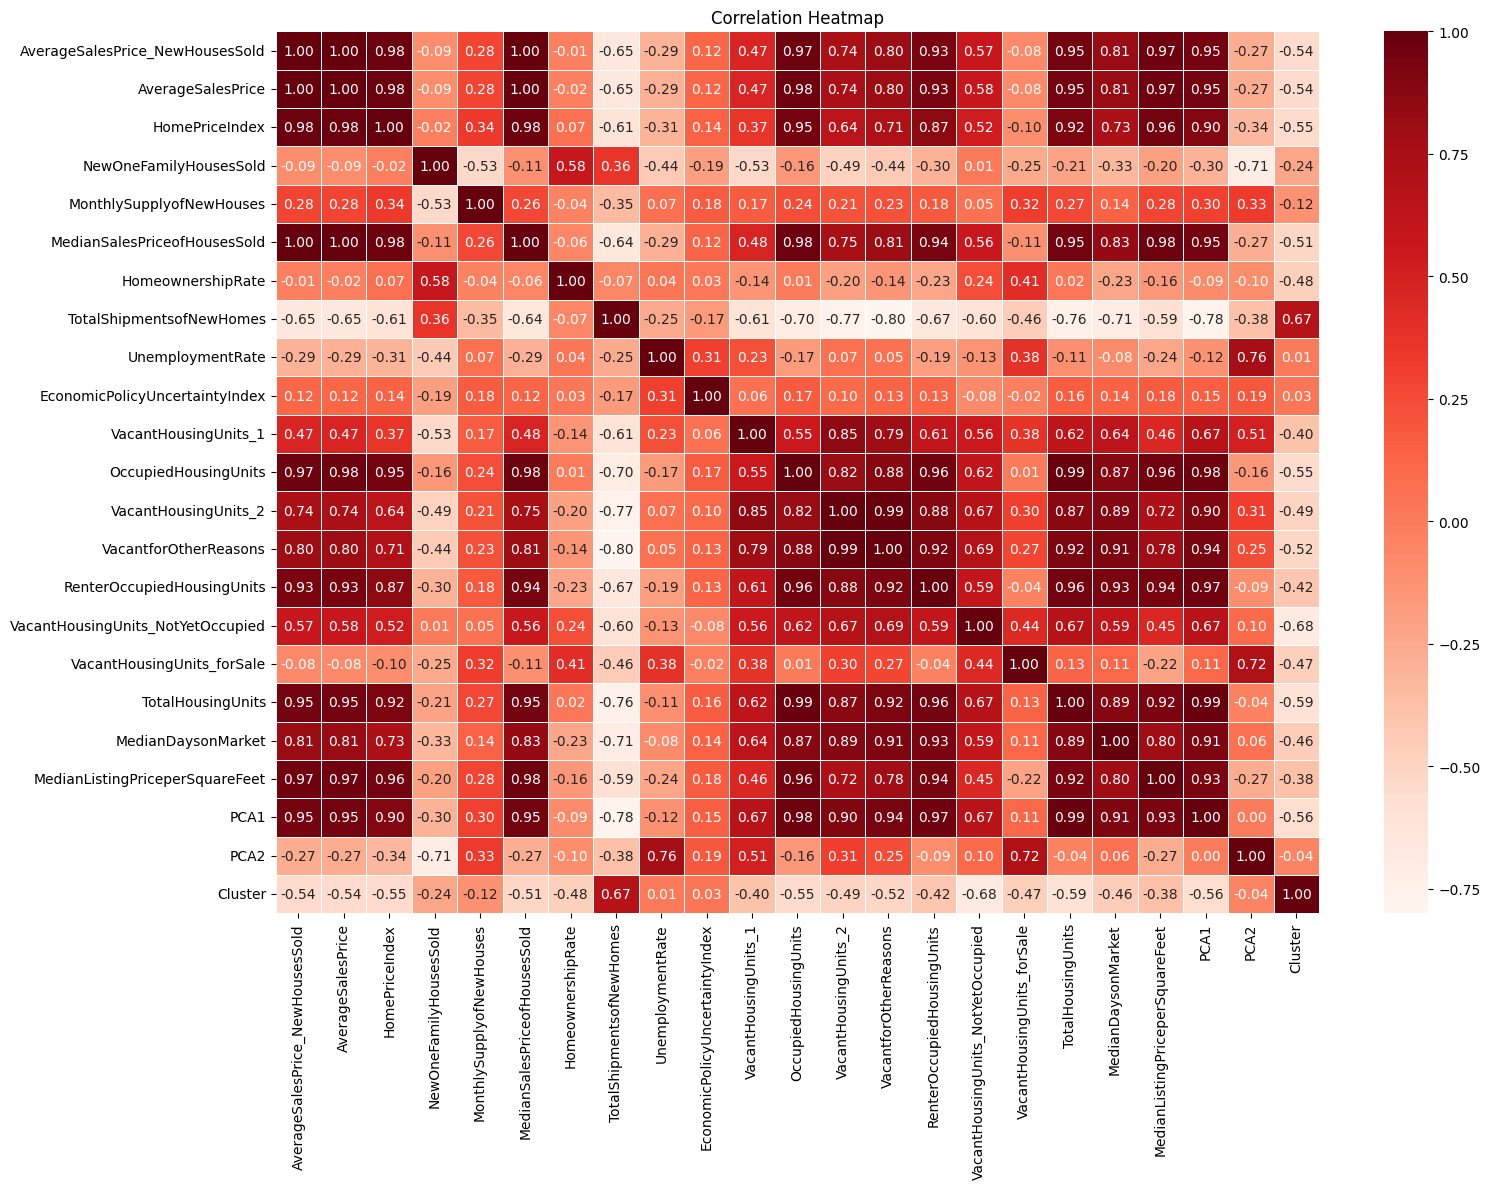

In [41]:
# Correlation Heatmap
plt.figure(figsize=(16, 12))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Reds', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Machine Learning

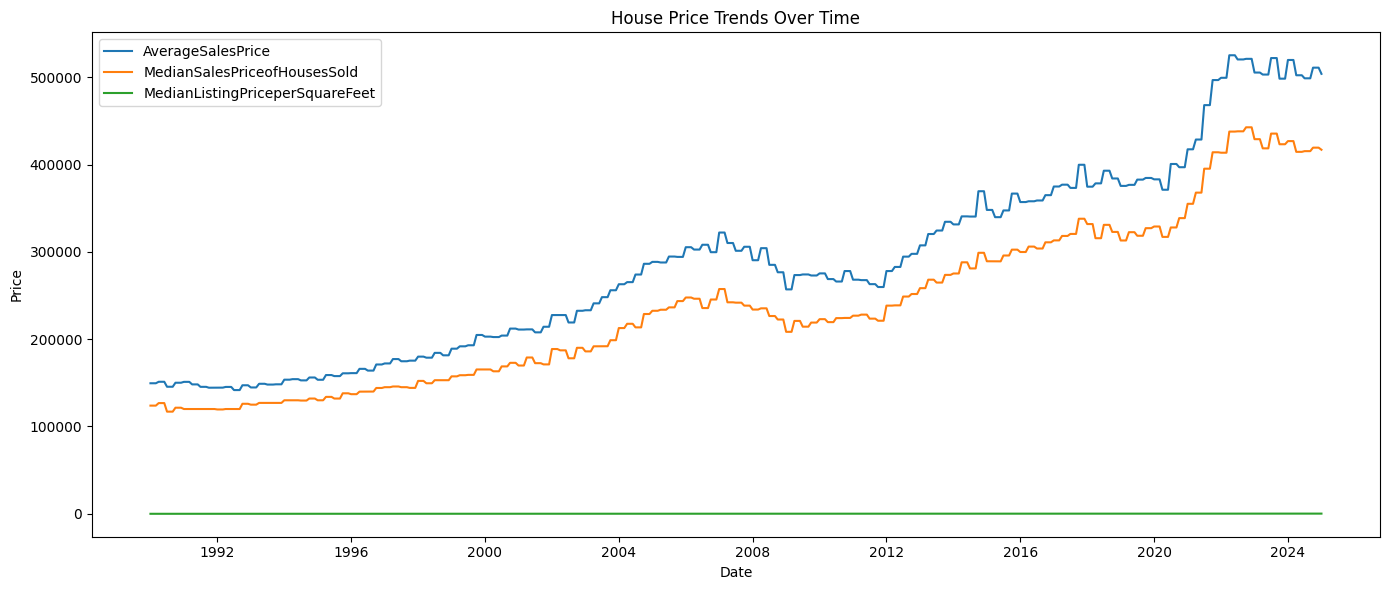

Mean Squared Error: 6.048
R² Score: 0.999


C:\Users\user\AppData\Local\Temp\ipykernel_10092\954626463.py:50: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




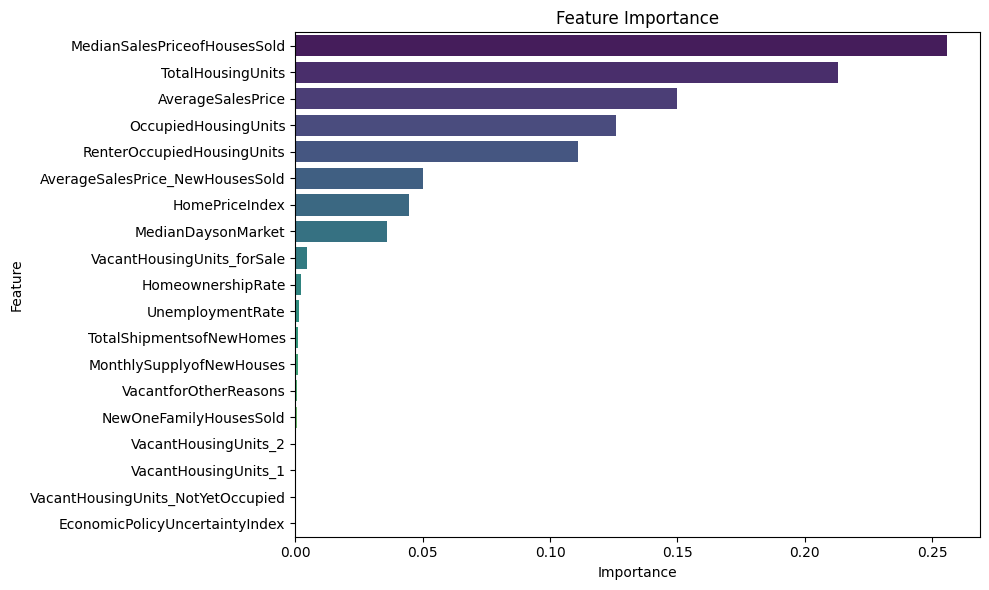

In [29]:
# PCA for dimensionality reduction
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(pca_result)

# Plot PCA Clusters
fig = px.scatter(df, x='PCA1', y='PCA2', color=df['Cluster'].astype(str),
                 title='KMeans Clustering on PCA Features')
fig.show()

# Time Series Trends
plt.figure(figsize=(14, 6))
for col in ['AverageSalesPrice', 'MedianSalesPriceofHousesSold', 'MedianListingPriceperSquareFeet']:
    sns.lineplot(data=df[col], label=col)
plt.title('House Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

# Machine Learning - Predict 'MedianListingPriceperSquareFeet'
X = df.drop(columns=['MedianListingPriceperSquareFeet', 'Cluster', 'PCA1', 'PCA2'])
y = df['MedianListingPriceperSquareFeet']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)
print(f"Mean Squared Error: {mse:.3f}")
print(f"R² Score: {r2:.3f}")

# Feature Importance
importances = model.feature_importances_
feat_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()